## EDA of Electric Vehicle Charging for a Reliable and Resilient Grid
This data set has been created as part of larger U.S. Department of Energy-funded project: Smart Electric Vehicle Charging for a Reliable and Resilient Grid (RECHARGE). The National Renewable Energy Laboratory (NREL) in Golden, Colorado, has two sites where employees can charge their vehicles: a parking garage at the South Table Mountain campus with 96 Level 2 plug-in electric vehicle (PEV) chargers and the National Wind Technology Center with 16 Level 2 PEV chargers.

In [1]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Read the data set
df =pd.read_csv("./data/dataSet_Oct2021.csv")
col_names = df.columns.tolist()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40979 entries, 0 to 40978
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   driverId             40979 non-null  int64  
 1   vehicle_model        33399 non-null  object 
 2   request_entry_time   40979 non-null  object 
 3   expected_departure   40979 non-null  object 
 4   station              40979 non-null  object 
 5   start_date_time      14588 non-null  object 
 6   end_date_time        14588 non-null  object 
 7   start_charge         36606 non-null  object 
 8   termin_charge        36606 non-null  object 
 9   controlled_duration  4763 non-null   float64
 10  miles_requested      40979 non-null  int64  
 11  max_charge_power     36606 non-null  float64
 12  kwh_requested        40979 non-null  float64
 13  energy_charged       40492 non-null  float64
 14  cost_for_session     40492 non-null  float64
 15  afterPaid            40979 non-null 

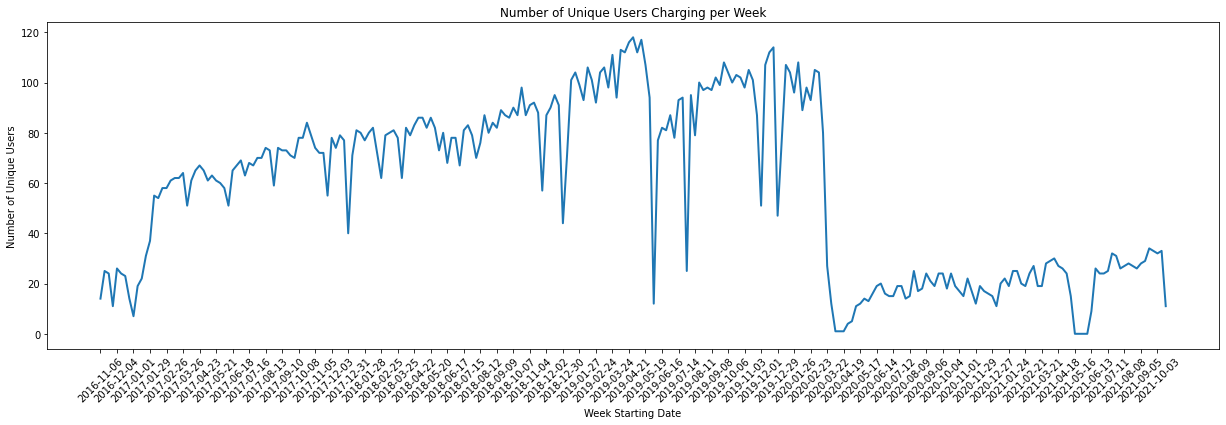

In [4]:
# plot the 'Number of Unique Users Charging per Week' graph
df['request_entry_time']= pd.to_datetime(df['request_entry_time'])
weekly_unique_users = df.groupby(pd.Grouper(key='request_entry_time', freq='W'))['driverId'].nunique()

fig, ax = plt.subplots(figsize=(21,6))
ax.plot(weekly_unique_users.index, weekly_unique_users.values, linewidth=2)

ax.set_title('Number of Unique Users Charging per Week')
ax.set_xlabel('Week Starting Date')
ax.set_ylabel('Number of Unique Users')

ax.set_xticks(weekly_unique_users.index[::4])
ax.set_xticklabels(weekly_unique_users.index.strftime('%Y-%m-%d')[::4], rotation=45)

plt.show()

# **Basic Analysis**
glimpse at the statistics of the data.
checking for null values.


In [5]:
df.sample(10)

,driverId,vehicle_model,request_entry_time,expected_departure,station,start_date_time,end_date_time,start_charge,termin_charge,controlled_duration,miles_requested,max_charge_power,kwh_requested,energy_charged,cost_for_session,afterPaid
18568,2582,BMW i3,2018-10-12 08:48:44,2018-10-12 17:00:00,15B,NaN,NaN,2018-10-12 08:48:00,2018-10-12 10:39:00,NaN,35,6.619333,10.15,16.192325,1.619232,False
34340,2627,NaN,2020-01-06 07:53:02,2020-01-06 11:27:02,LV21-03,2020-01-06 07:53:42,2020-01-06 11:20:47,2020-01-06 07:53:02,2020-01-06 09:51:13,NaN,20,3.111000,8.00,5.656000,0.565600,True
35304,1184,NaN,2020-01-28 09:52:51,2020-01-28 17:41:51,01B,2020-01-28 09:52:40,2020-01-28 12:14:04,2020-01-28 09:56:59,2020-01-28 12:18:08,NaN,120,6.605000,32.04,14.896000,1.489600,True
5747,24,Ford Fusion,2017-08-11 11:23:29,2017-08-11 13:00:00,09B,NaN,NaN,2017-08-11 11:15:00,2017-08-11 14:00:00,NaN,15,1.682301,5.55,9.378895,0.937890,False
21171,2,Chevy Bolt,2019-01-02 08:49:29,2019-01-02 17:35:00,13B,NaN,NaN,2019-01-02 08:49:00,2019-01-02 11:31:00,NaN,75,6.719683,21.00,17.918522,1.791852,False
9294,40,Chevy Volt,2017-12-15 13:46:59,2017-12-15 16:30:00,17B,NaN,NaN,2017-12-15 13:45:00,2017-12-15 16:30:00,0.583333,29,1.599909,10.15,7.502533,0.750253,False
21186,46,Ford C-Max,2019-01-02 09:55:50,2019-01-02 15:40:00,18A,NaN,NaN,2019-01-02 09:55:00,2019-01-02 11:21:00,NaN,10,3.408300,3.70,4.288248,0.678825,False
40251,16647,NaN,2021-07-28 07:01:00,2021-07-28 14:01:32,08A,2021-07-28 07:00:33,2021-07-28 14:31:30,2021-07-28 07:06:40,2021-07-28 14:31:46,NaN,50,3.263000,17.50,12.881000,1.288100,True
35195,2815,NaN,2020-01-27 07:10:32,2020-01-27 16:11:32,LV22-14,2020-01-27 07:10:56,2020-01-27 16:26:30,2020-01-27 07:10:34,2020-01-27 09:53:43,NaN,30,6.307000,12.00,6.774000,0.677400,True
40909,16590,NaN,2021-10-04 11:39:00,2021-10-04 19:39:23,LV11-07,2021-10-04 11:39:52,2021-10-05 03:55:58,2021-10-04 11:39:28,2021-10-04 13:25:44,NaN,32,3.275000,8.96,5.617000,0.561700,True


In [6]:
df.head()

,driverId,vehicle_model,request_entry_time,expected_departure,station,start_date_time,end_date_time,start_charge,termin_charge,controlled_duration,miles_requested,max_charge_power,kwh_requested,energy_charged,cost_for_session,afterPaid
0,134,Nissan LEAF,2016-11-03 10:01:03,2016-11-03 16:30:00,10B,NaN,NaN,NaN,NaN,NaN,35,NaN,10.5,NaN,NaN,False
1,134,Nissan LEAF,2016-11-03 10:12:35,2016-11-03 16:30:00,10A,NaN,NaN,NaN,NaN,NaN,35,NaN,10.5,NaN,NaN,False
2,79,Mitsubishi iMiEV,2016-11-03 10:18:11,2016-11-03 16:00:00,03A,NaN,NaN,NaN,NaN,NaN,25,NaN,7.5,NaN,NaN,False
3,299,Chevy Volt,2016-11-03 11:06:13,2016-11-03 13:00:00,15B,NaN,NaN,2016-11-03 10:45:00,2016-11-03 11:00:00,NaN,40,1.538424,14.0,2.994376,0.299438,False
4,2633,Chevy Volt,2016-11-03 11:19:17,2016-11-03 17:00:00,04B,NaN,NaN,NaN,NaN,NaN,50,NaN,17.5,NaN,NaN,False


In [7]:
null_counts = df.isnull().sum()
print(null_counts)
total_missing = null_counts.sum()
null_percentages = null_counts / len(df) * 100
for col in df.columns:
    print(f"{col}:")
    print(f"    Total missing values: {null_counts[col]}, Percentage of missing values: {null_percentages[col]:.2f}%")

driverId                   0
vehicle_model           7580
request_entry_time         0
expected_departure         0
station                    0
start_date_time        26391
end_date_time          26391
start_charge            4373
termin_charge           4373
controlled_duration    36216
miles_requested            0
max_charge_power        4373
kwh_requested              0
energy_charged           487
cost_for_session         487
afterPaid                  0
dtype: int64
driverId:
    Total missing values: 0, Percentage of missing values: 0.00%
vehicle_model:
    Total missing values: 7580, Percentage of missing values: 18.50%
request_entry_time:
    Total missing values: 0, Percentage of missing values: 0.00%
expected_departure:
    Total missing values: 0, Percentage of missing values: 0.00%
station:
    Total missing values: 0, Percentage of missing values: 0.00%
start_date_time:
    Total missing values: 26391, Percentage of missing values: 64.40%
end_date_time:
    Total missing 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40979 entries, 0 to 40978
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   driverId             40979 non-null  int64         
 1   vehicle_model        33399 non-null  object        
 2   request_entry_time   40979 non-null  datetime64[ns]
 3   expected_departure   40979 non-null  object        
 4   station              40979 non-null  object        
 5   start_date_time      14588 non-null  object        
 6   end_date_time        14588 non-null  object        
 7   start_charge         36606 non-null  object        
 8   termin_charge        36606 non-null  object        
 9   controlled_duration  4763 non-null   float64       
 10  miles_requested      40979 non-null  int64         
 11  max_charge_power     36606 non-null  float64       
 12  kwh_requested        40979 non-null  float64       
 13  energy_charged       40492 non-

In [9]:
for col in df.columns:
    print(f"Number of unique values in {col}: {df[col].nunique()}")

Number of unique values in driverId: 397
Number of unique values in vehicle_model: 26
Number of unique values in request_entry_time: 40698
Number of unique values in expected_departure: 27596
Number of unique values in station: 141
Number of unique values in start_date_time: 14441
Number of unique values in end_date_time: 14564
Number of unique values in start_charge: 28488
Number of unique values in termin_charge: 30238
Number of unique values in controlled_duration: 210
Number of unique values in miles_requested: 196
Number of unique values in max_charge_power: 25913
Number of unique values in kwh_requested: 836
Number of unique values in energy_charged: 36008
Number of unique values in cost_for_session: 36602
Number of unique values in afterPaid: 2


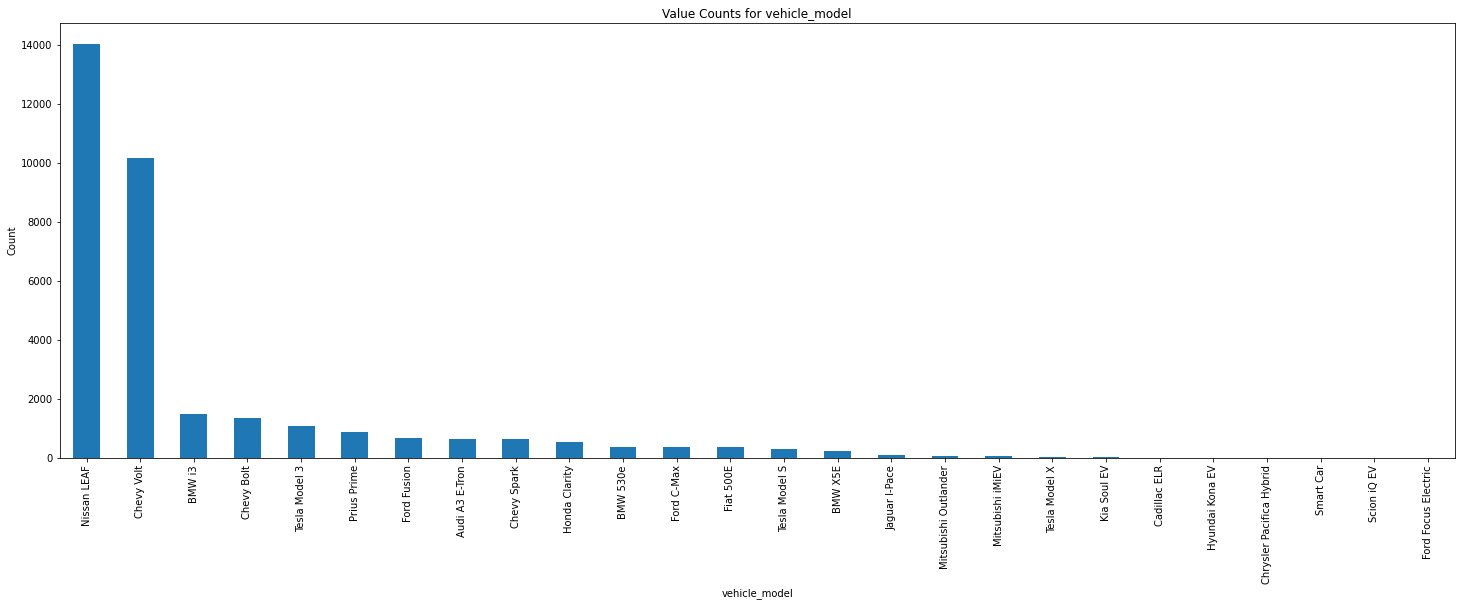

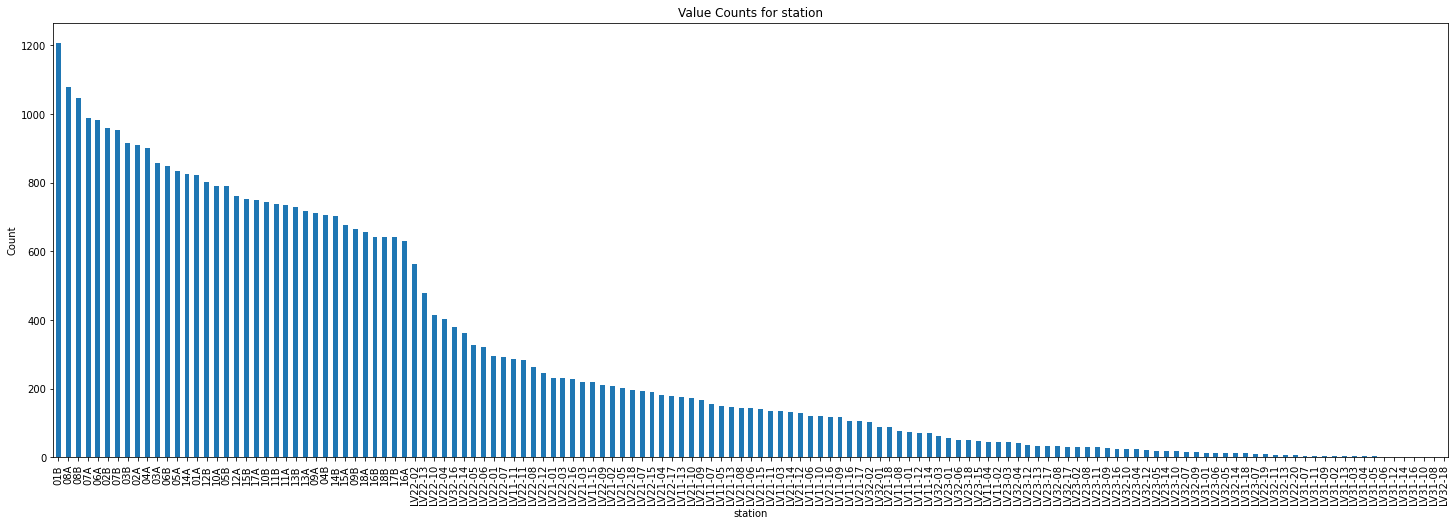

In [10]:
# cols_to_plot = [ 'vehicle_model', 'station']
cols_to_plot = ['vehicle_model', 'station']

for col in cols_to_plot:
    counts = df[col].value_counts()
    counts.plot(kind='bar', figsize=(25,8))
    plt.title(f'Value Counts for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [11]:
# checking statistics(mean, median, quartile) for 'controlled_duration', 'miles_requested', 'max_charge_power', 'kwh_requested', 'energy_charged', 'cost_for_session' columns
cols_to_analyze = ['controlled_duration', 'miles_requested', 'max_charge_power', 'kwh_requested', 'energy_charged', 'cost_for_session']

for col in cols_to_analyze:
    print(f"Statistics for column '{col}':")
    print(df[col].describe())
    print(f"IQR (interquartile range) for column '{col}': {df[col].quantile(0.75) - df[col].quantile(0.25)}")
    print(f"CV (coefficient of variation) for column '{col}': {df[col].std() / df[col].mean()}\n")


Statistics for column 'controlled_duration':
count    4763.000000
mean        0.172773
std         0.715521
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.133330
Name: controlled_duration, dtype: float64
IQR (interquartile range) for column 'controlled_duration': 0.0
CV (coefficient of variation) for column 'controlled_duration': 4.141400272809799

Statistics for column 'miles_requested':
count    40979.000000
mean        49.995095
std         34.026499
min       -396.000000
25%         30.000000
50%         40.000000
75%         60.000000
max        300.000000
Name: miles_requested, dtype: float64
IQR (interquartile range) for column 'miles_requested': 30.0
CV (coefficient of variation) for column 'miles_requested': 0.6805967435110045

Statistics for column 'max_charge_power':
count    36606.000000
mean         3.988721
std          1.811907
min          0.001000
25%          3.059198
50%          3.312000
75%          6.281646
max   

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40979 entries, 0 to 40978
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   driverId             40979 non-null  int64         
 1   vehicle_model        33399 non-null  object        
 2   request_entry_time   40979 non-null  datetime64[ns]
 3   expected_departure   40979 non-null  object        
 4   station              40979 non-null  object        
 5   start_date_time      14588 non-null  object        
 6   end_date_time        14588 non-null  object        
 7   start_charge         36606 non-null  object        
 8   termin_charge        36606 non-null  object        
 9   controlled_duration  4763 non-null   float64       
 10  miles_requested      40979 non-null  int64         
 11  max_charge_power     36606 non-null  float64       
 12  kwh_requested        40979 non-null  float64       
 13  energy_charged       40492 non-

# **Data Preprocessing**

**Removing unnecessary columns: request_entry_time, expected_departure, start_date_time, end_date_time, controlled_duration, cost_for_session**

In [13]:
# function for removing unnecessary columns
def dropping_unnecessary_columns(dataframe, columns_tobe_dropped):
  for column in columns_tobe_dropped:
    dataframe.drop([column], axis=1, inplace=True)

  return dataframe

In [14]:
columns_tobe_dropped = ['request_entry_time', 'expected_departure', 'start_date_time', 'end_date_time', 'controlled_duration', 'cost_for_session']
df = dropping_unnecessary_columns(dataframe = df, columns_tobe_dropped = columns_tobe_dropped)

**Removing negative and null values from miles_requested, max_charge_power, kwh_requested, energy_charged**

In [15]:
# function to remove negative value from the columns
def remove_negatives(dataframe, columns):
    new_df = dataframe.dropna(subset=columns)
    return new_df[(new_df[columns] >= 0).all(axis=1)]

In [16]:
# Removing negative values from 'miles_requested', 'max_charge_power', 'kwh_requested', 'energy_charged'
columns_to_check = ['miles_requested', 'max_charge_power', 'kwh_requested', 'energy_charged']
df = remove_negatives(dataframe = df, columns = columns_to_check)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36599 entries, 3 to 40978
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   driverId          36599 non-null  int64  
 1   vehicle_model     31024 non-null  object 
 2   station           36599 non-null  object 
 3   start_charge      36599 non-null  object 
 4   termin_charge     36599 non-null  object 
 5   miles_requested   36599 non-null  int64  
 6   max_charge_power  36599 non-null  float64
 7   kwh_requested     36599 non-null  float64
 8   energy_charged    36599 non-null  float64
 9   afterPaid         36599 non-null  bool   
dtypes: bool(1), float64(3), int64(2), object(4)
memory usage: 2.8+ MB


In [18]:
# function for checking null values
def check_null_values(dataframe):
    return dataframe.isnull().sum()

In [19]:
null_df = check_null_values(df)

In [20]:
null_df

driverId               0
vehicle_model       5575
station                0
start_charge           0
termin_charge          0
miles_requested        0
max_charge_power       0
kwh_requested          0
energy_charged         0
afterPaid              0
dtype: int64

**Timezone correction for the time related column**

In [21]:
# function for correcting timezone in start_charge and Termin_charge [converting the time to America/Los_Angeles]
def timezonecorrection(dataframe, columns_tobe_converted):
    for column in columns_tobe_converted:
        dataframe[column] = pd.to_datetime(dataframe[column], utc=False, errors='ignore')
        dataframe[column] = dataframe[column].map(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S.%f', yearfirst=True).tz_localize('UTC').tz_convert('America/Los_Angeles'))
        dataframe[column] = dataframe[column].dt.strftime('%Y-%m-%d %H:%M:%S.%f')
        dataframe[column] = pd.to_datetime(dataframe[column])
    return dataframe


In [22]:
columns_tobe_converted = ['start_charge', 'termin_charge']
df = timezonecorrection(dataframe = df, columns_tobe_converted = columns_tobe_converted)

In [23]:
dataframe = df.dropna(subset=['vehicle_model'])

In [24]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31024 entries, 3 to 40978
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   driverId          31024 non-null  int64         
 1   vehicle_model     31024 non-null  object        
 2   station           31024 non-null  object        
 3   start_charge      31024 non-null  datetime64[ns]
 4   termin_charge     31024 non-null  datetime64[ns]
 5   miles_requested   31024 non-null  int64         
 6   max_charge_power  31024 non-null  float64       
 7   kwh_requested     31024 non-null  float64       
 8   energy_charged    31024 non-null  float64       
 9   afterPaid         31024 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 2.4+ MB


In [25]:
# sorting the data with respect to date time of 'start_charge' column
dataframe = dataframe.sort_values(by='start_charge')
dataframe.head()

,driverId,vehicle_model,station,start_charge,termin_charge,miles_requested,max_charge_power,kwh_requested,energy_charged,afterPaid
3,299,Chevy Volt,15B,2016-11-03 03:45:00,2016-11-03 04:00:00,40,1.538424,14.00,2.994376,False
6,93,Nissan LEAF,02A,2016-11-04 00:45:00,2016-11-04 02:15:00,90,3.031380,27.00,8.832178,False
7,85,Nissan LEAF,15B,2016-11-04 00:45:00,2016-11-04 02:45:00,20,1.771489,6.00,8.376392,False
9,87,Nissan LEAF,11B,2016-11-04 00:45:00,2016-11-04 03:30:00,30,3.049094,9.00,13.637064,False
5,159,Chevy Volt,12B,2016-11-04 01:15:00,2016-11-04 03:15:00,5,1.582000,1.75,7.877445,False


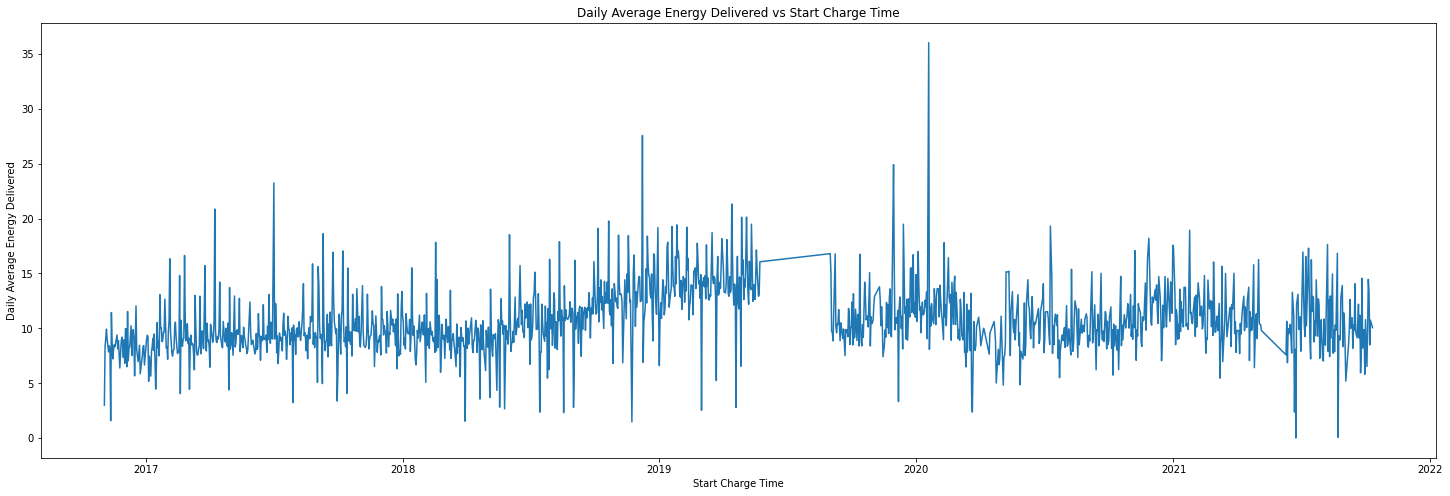

In [26]:
# plot the 'Daily Average Energy Delivered vs Start Charge Time'
daily_energy = dataframe.groupby(pd.to_datetime(dataframe['start_charge']).dt.date)['energy_charged'].mean().reset_index()

fig, ax = plt.subplots(figsize=(25, 8))  # Set the figure size

ax.plot(daily_energy['start_charge'], daily_energy['energy_charged'])
ax.set(title='Daily Average Energy Delivered vs Start Charge Time', xlabel='Start Charge Time', ylabel='Daily Average Energy Delivered')

plt.show()

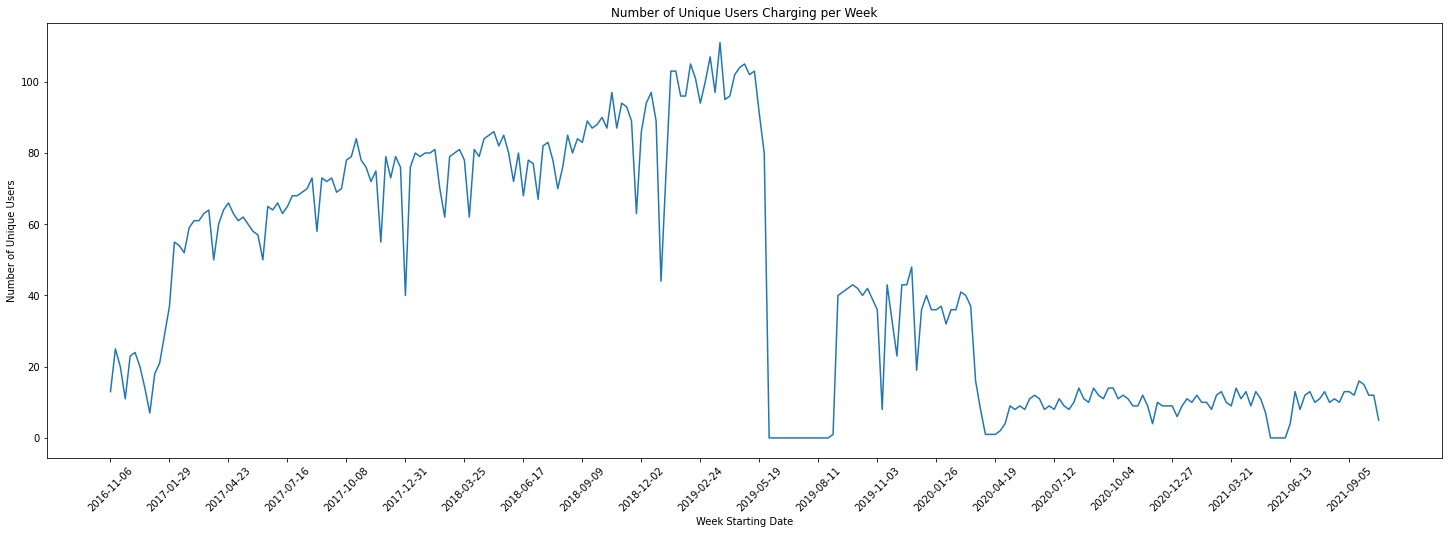

In [27]:
# plot the 'Number of Unique Users Charging per Week'
weekly_unique_users = dataframe.groupby(pd.Grouper(key='start_charge', freq='W'))['driverId'].nunique()
plt.figure(figsize=(25, 8))
plt.plot(weekly_unique_users.index, weekly_unique_users.values)
plt.title('Number of Unique Users Charging per Week')
plt.xlabel('Week Starting Date')
plt.ylabel('Number of Unique Users')
plt.xticks(weekly_unique_users.index[::12], weekly_unique_users.index.strftime('%Y-%m-%d')[::12], rotation=45)
plt.show()


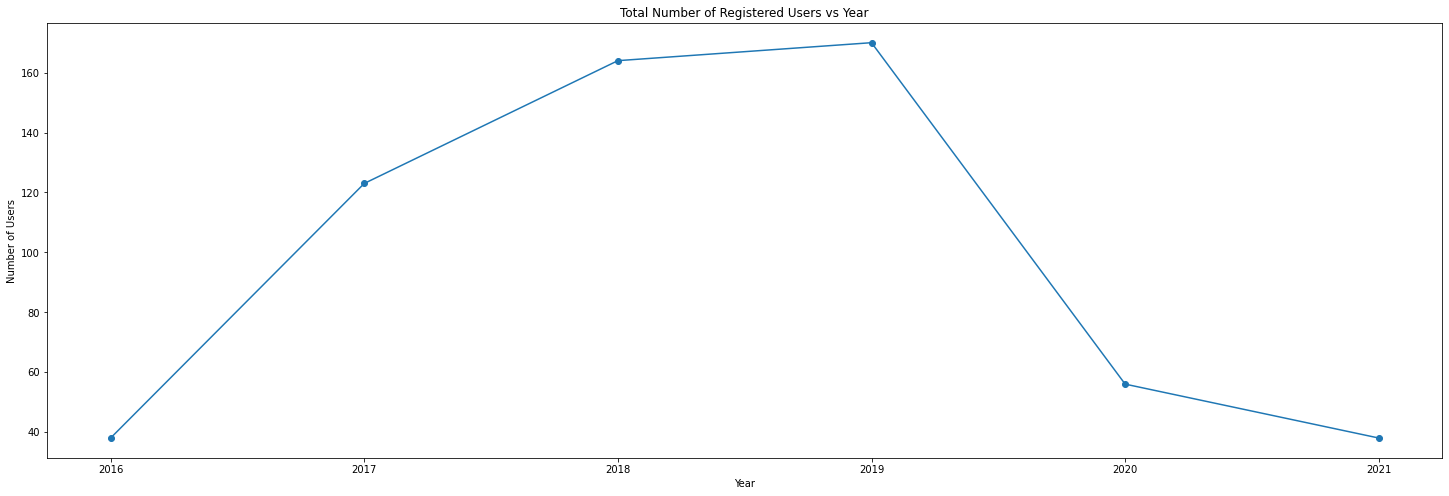

In [28]:
# plot 'Total Number of Registered Users vs Year'
users_by_year = dataframe.groupby(dataframe['start_charge'].dt.year)['driverId'].nunique()

fig, ax = plt.subplots(figsize=(25, 8))
ax.plot(users_by_year.index, users_by_year.values, '-o')

ax.set_title('Total Number of Registered Users vs Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Users')

plt.show()


**Last Unpaid Date: 2019-05-24**
There is drastic drop in our Number of Unique Users Charging per Week due to the introduction of charge from 2019-05-24. 

In [29]:
last_unpaid_row = df.loc[df['afterPaid'] == False].iloc[-1]
last_unpaid_row

driverId                            146
vehicle_model               Nissan LEAF
station                             01B
start_charge        2019-05-24 04:58:00
termin_charge       2019-05-24 07:38:00
miles_requested                      30
max_charge_power                6.46035
kwh_requested                       9.0
energy_charged                19.891239
afterPaid                         False
Name: 26750, dtype: object

**First Paid Date: 2019-09-01**

In [30]:
first_paid_row = dataframe.loc[dataframe['afterPaid'] == True].iloc[0]
first_paid_row

driverId                           2574
vehicle_model               Nissan LEAF
station                         LV22-14
start_charge        2019-09-01 02:59:38
termin_charge       2019-09-01 06:30:51
miles_requested                      60
max_charge_power                  6.302
kwh_requested                      24.0
energy_charged                   16.804
afterPaid                          True
Name: 29779, dtype: object

In [31]:
dataframe.head()

,driverId,vehicle_model,station,start_charge,termin_charge,miles_requested,max_charge_power,kwh_requested,energy_charged,afterPaid
3,299,Chevy Volt,15B,2016-11-03 03:45:00,2016-11-03 04:00:00,40,1.538424,14.00,2.994376,False
6,93,Nissan LEAF,02A,2016-11-04 00:45:00,2016-11-04 02:15:00,90,3.031380,27.00,8.832178,False
7,85,Nissan LEAF,15B,2016-11-04 00:45:00,2016-11-04 02:45:00,20,1.771489,6.00,8.376392,False
9,87,Nissan LEAF,11B,2016-11-04 00:45:00,2016-11-04 03:30:00,30,3.049094,9.00,13.637064,False
5,159,Chevy Volt,12B,2016-11-04 01:15:00,2016-11-04 03:15:00,5,1.582000,1.75,7.877445,False


In [32]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31024 entries, 3 to 40978
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   driverId          31024 non-null  int64         
 1   vehicle_model     31024 non-null  object        
 2   station           31024 non-null  object        
 3   start_charge      31024 non-null  datetime64[ns]
 4   termin_charge     31024 non-null  datetime64[ns]
 5   miles_requested   31024 non-null  int64         
 6   max_charge_power  31024 non-null  float64       
 7   kwh_requested     31024 non-null  float64       
 8   energy_charged    31024 non-null  float64       
 9   afterPaid         31024 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 2.4+ MB


In [33]:
dataframe['vehicle_model'] = dataframe['vehicle_model'].astype('category')
dataframe['station'] = dataframe['station'].astype('category')
dataframe['afterPaid'] = dataframe['afterPaid'].astype('category')

In [34]:
duplicate_rows = dataframe[dataframe.duplicated(subset=['start_charge'])]
duplicate_rows

,driverId,vehicle_model,station,start_charge,termin_charge,miles_requested,max_charge_power,kwh_requested,energy_charged,afterPaid
7,85,Nissan LEAF,15B,2016-11-04 00:45:00,2016-11-04 02:45:00,20,1.771489,6.0,8.376392,False
9,87,Nissan LEAF,11B,2016-11-04 00:45:00,2016-11-04 03:30:00,30,3.049094,9.0,13.637064,False
10,115,Chevy Volt,07A,2016-11-04 01:15:00,2016-11-04 04:45:00,10,3.016101,3.5,14.567150,False
17,16,Nissan LEAF,07B,2016-11-06 23:15:00,2016-11-07 01:45:00,40,3.004626,12.0,7.830878,False
20,2411,Nissan LEAF,08B,2016-11-06 23:15:00,2016-11-07 02:00:00,40,2.960884,12.0,9.018265,False
...,...,...,...,...,...,...,...,...,...,...
39929,2687,Honda Clarity,LV11-13,2021-06-22 06:39:04,2021-06-22 06:39:11,40,1.441000,12.4,0.002000,True
39931,2687,Honda Clarity,LV11-13,2021-06-22 06:42:06,2021-06-22 06:42:14,40,1.439000,12.4,0.002000,True
40481,402,Chevy Spark,LV22-09,2021-08-23 06:22:59,2021-08-23 06:25:17,30,1.798000,8.4,0.031000,True
40646,402,Chevy Spark,LV22-12,2021-09-08 05:06:45,2021-09-08 09:06:39,50,3.414000,14.0,8.222000,True
